In [1]:
# Install scikit-learn package
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\nidhi\anaconda3\lib\site-packages (0.22.1)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

def readMatrix(file):
    # Use the code below to read files
    fd = open(file, 'r')
    hdr = fd.readline()
    rows, cols = [int(s) for s in fd.readline().strip().split()]
    tokens = fd.readline().strip().split()
    matrix = np.zeros((rows, cols))
    Y = []
    for i, line in enumerate(fd):
        nums = [int(x) for x in line.strip().split()]
        Y.append(nums[0])
        kv = np.array(nums[1:])
        k = np.cumsum(kv[:-1:2])
        v = kv[1::2]
        matrix[i, k] = v
    return matrix, tokens, np.array(Y)

def evaluate(output, label):
    # Use the code below to obtain the accuracy of your algorithm
    error = float((output != label).sum()) * 1. / len(output)
    print('Error: {:2.4f}%'.format(100*error))
    return error

In [3]:
# Note1: tokenlists (list of all tokens) from MATRIX.TRAIN and MATRIX.TEST are identical
# Note2: Spam emails are denoted as class 1, and non-spam ones as class 0.
# Note3: The shape of the data matrix (document matrix): (number of emails) by (number of tokens)

# Load files
dataMatrix_train, tokenlist, category_train = readMatrix('q5_data/MATRIX.TRAIN')
dataMatrix_test, tokenlist, category_test = readMatrix('q5_data/MATRIX.TEST')

# Train
model = LinearSVC(max_iter = 10000)
model.fit(dataMatrix_train, category_train)


# Test and evluate
prediction = np.ones(dataMatrix_test.shape[0])
prediction = model.predict(dataMatrix_test)
evaluate(prediction, category_test)

Error: 0.3750%


0.00375

In [4]:
#Q4(c)

size = []
error = []
#For Training Size 50
dataMatrix_train, tokenlist, category_train = readMatrix('q5_data/MATRIX.TRAIN.50')
dataMatrix_test, tokenlist, category_test = readMatrix('q5_data/MATRIX.TEST')

# Train
model.fit(dataMatrix_train, category_train)
size.append(dataMatrix_train.shape[0])

# Test and evluate
prediction = np.ones(dataMatrix_test.shape[0])
prediction = model.predict(dataMatrix_test)
error.append(evaluate(prediction, category_test))

#For Training Size 100
dataMatrix_train, tokenlist, category_train = readMatrix('q5_data/MATRIX.TRAIN.100')
dataMatrix_test, tokenlist, category_test = readMatrix('q5_data/MATRIX.TEST')

# Train
model.fit(dataMatrix_train, category_train)
size.append(dataMatrix_train.shape[0])

# Test and evluate
prediction = np.ones(dataMatrix_test.shape[0])
prediction = model.predict(dataMatrix_test)
error.append(evaluate(prediction, category_test))

#For Training Size 200
dataMatrix_train, tokenlist, category_train = readMatrix('q5_data/MATRIX.TRAIN.200')
dataMatrix_test, tokenlist, category_test = readMatrix('q5_data/MATRIX.TEST')

# Train
model.fit(dataMatrix_train, category_train)
size.append(dataMatrix_train.shape[0])

# Test and evluate
prediction = np.ones(dataMatrix_test.shape[0])
prediction = model.predict(dataMatrix_test)
error.append(evaluate(prediction, category_test))

#For Training Size 400
dataMatrix_train, tokenlist, category_train = readMatrix('q5_data/MATRIX.TRAIN.400')
dataMatrix_test, tokenlist, category_test = readMatrix('q5_data/MATRIX.TEST')

# Train
model.fit(dataMatrix_train, category_train)
size.append(dataMatrix_train.shape[0])

# Test and evluate
prediction = np.ones(dataMatrix_test.shape[0])
prediction = model.predict(dataMatrix_test)
error.append(evaluate(prediction, category_test))

#For Training Size 800
dataMatrix_train, tokenlist, category_train = readMatrix('q5_data/MATRIX.TRAIN.800')
dataMatrix_test, tokenlist, category_test = readMatrix('q5_data/MATRIX.TEST')

# Train
model.fit(dataMatrix_train, category_train)
size.append(dataMatrix_train.shape[0])

# Test and evluate
prediction = np.ones(dataMatrix_test.shape[0])
prediction = model.predict(dataMatrix_test)
error.append(evaluate(prediction, category_test))

#For Training Size 1400
dataMatrix_train, tokenlist, category_train = readMatrix('q5_data/MATRIX.TRAIN.1400')
dataMatrix_test, tokenlist, category_test = readMatrix('q5_data/MATRIX.TEST')

# Train
model.fit(dataMatrix_train, category_train)
size.append(dataMatrix_train.shape[0])

# Test and evluate
prediction = np.ones(dataMatrix_test.shape[0])
prediction = model.predict(dataMatrix_test)
error.append(evaluate(prediction, category_test))
print('For Linear SVM')
for i in range(6):
    print('For Training Set of Size %i,' %size[i])
    print('the Error is %g%%' %(error[i]*100))

Error: 5.0000%
Error: 3.0000%
Error: 1.2500%
Error: 1.0000%
Error: 1.0000%
Error: 0.8750%
For Linear SVM
For Training Set of Size 50,
the Error is 5%
For Training Set of Size 100,
the Error is 3%
For Training Set of Size 200,
the Error is 1.25%
For Training Set of Size 400,
the Error is 1%
For Training Set of Size 800,
the Error is 1%
For Training Set of Size 1400,
the Error is 0.875%


Text(0, 0.5, 'Test Error')

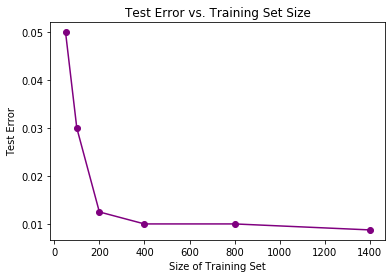

In [5]:
plt.plot(size, error, '-o', color='purple')
plt.title('Test Error vs. Training Set Size')
plt.xlabel('Size of Training Set')
plt.ylabel('Test Error')

In [6]:
#Naive Bayes:
def readMatrix(file):
    # Use the code below to read files
    fd = open(file, 'r')
    hdr = fd.readline()
    rows, cols = [int(s) for s in fd.readline().strip().split()]
    tokens = fd.readline().strip().split()
    matrix = np.zeros((rows, cols))
    Y = []
    for i, line in enumerate(fd):
        nums = [int(x) for x in line.strip().split()]
        Y.append(nums[0])
        kv = np.array(nums[1:])
        k = np.cumsum(kv[:-1:2])
        v = kv[1::2]
        matrix[i, k] = v
    return matrix, tokens, np.array(Y)

def nb_train(matrix, category):
    # Implement your algorithm and return 
    state = {}
    N = matrix.shape[1]
    matrix_spam = matrix[category==1] 
    matrix_nspam = matrix[category==0]
    #print(matrix_spam)
    state['mu_s'] = (np.sum(matrix_spam, axis=0) + 1) / (np.sum(matrix_spam) + N)
    state['mu_ns'] = (np.sum(matrix_nspam, axis=0) + 1) / (np.sum(matrix_nspam) + N)
    #state['phi'] = np.sum(category==1) / matrix.shape[0]
    state['phi'] = matrix_spam.shape[0] / matrix.shape[0]
    ''''mat1 = matrix[category == 1, :]
    mat0 = matrix[category == 0, :]

    # documentation length, i.e. number of tokens in each document
    #mat1_doc_lens = mat1.sum(axis=1)
    # yeq1 means "given y equals 1"
    state['mu_s'] = (mat1.sum(axis=0) + 1) / (np.sum(mat1) + N)

    #mat0_doc_lens = mat0.sum(axis=1)
    state['mu_ns'] = (mat0.sum(axis=0) + 1) / (np.sum(mat0) + N)

    state['phi'] = mat1.shape[0] / (mat1.shape[0] + mat0.shape[0])'''
    
    ############################
    # Implement your code here #
    ############################
    
    return state

def nb_test(matrix, state):
    # Classify each email in the test set (each row of the document matrix) as 1 for SPAM and 0 for NON-SPAM
    output = np.zeros(matrix.shape[0])
    
    ############################
    # Implement your code here #
    mu_s = state['mu_s']
    mu_ns =  state['mu_ns']
    phi = state['phi']
    
    #classification using baye's rule

    log_spam = np.log(mu_s) * matrix 
    log_nspam = np.log(mu_ns) * matrix
    log_mu_s = np.sum(log_spam, axis=1) 
    log_mu_ns = np.sum(log_nspam, axis=1)
    term = log_mu_ns + np.log(1-phi) - log_mu_s - np.log(phi)
    probs = 1./(1 + np.exp(term))
    probns = 1 - probs
    #implementing MAP
    output[probs > probns] = 1
        
    ############################
    
    return output

def evaluate(output, label):
    # Use the code below to obtain the accuracy of your algorithm
    error = (output != label).sum() * 1. / len(output)
    print('Error: {:2.4f}%'.format(100*error))
    return error

In [7]:
# Note1: tokenlists (list of all tokens) from MATRIX.TRAIN and MATRIX.TEST are identical
# Note2: Spam emails are denoted as class 1, and non-spam ones as class 0.
# Note3: The shape of the data matrix (document matrix): (number of emails) by (number of tokens)

# Load files
dataMatrix_train, tokenlist, category_train = readMatrix('q5_data/MATRIX.TRAIN')
dataMatrix_test, tokenlist, category_test = readMatrix('q5_data/MATRIX.TEST')

# Train
state = nb_train(dataMatrix_train, category_train)

# Test and evluate
prediction = nb_test(dataMatrix_test, state)
evaluate(prediction, category_test)

Error: 1.6250%


0.01625

In [8]:
size = []
error1 = []
#For Training Size 50
dataMatrix_train, tokenlist, category_train = readMatrix('q5_data/MATRIX.TRAIN.50')
dataMatrix_test, tokenlist, category_test = readMatrix('q5_data/MATRIX.TEST')

# Train
state = nb_train(dataMatrix_train, category_train)
size.append(dataMatrix_train.shape[0])

# Test and evluate
prediction = nb_test(dataMatrix_test, state)
error1.append(evaluate(prediction, category_test))

#For Training Size 100
dataMatrix_train, tokenlist, category_train = readMatrix('q5_data/MATRIX.TRAIN.100')
dataMatrix_test, tokenlist, category_test = readMatrix('q5_data/MATRIX.TEST')

# Train
state = nb_train(dataMatrix_train, category_train)
size.append(dataMatrix_train.shape[0])

# Test and evluate
prediction = nb_test(dataMatrix_test, state)
error1.append(evaluate(prediction, category_test))

#For Training Size 200
dataMatrix_train, tokenlist, category_train = readMatrix('q5_data/MATRIX.TRAIN.200')
dataMatrix_test, tokenlist, category_test = readMatrix('q5_data/MATRIX.TEST')

# Train
state = nb_train(dataMatrix_train, category_train)
size.append(dataMatrix_train.shape[0])

# Test and evluate
prediction = nb_test(dataMatrix_test, state)
error1.append(evaluate(prediction, category_test))

#For Training Size 400
dataMatrix_train, tokenlist, category_train = readMatrix('q5_data/MATRIX.TRAIN.400')
dataMatrix_test, tokenlist, category_test = readMatrix('q5_data/MATRIX.TEST')

# Train
state = nb_train(dataMatrix_train, category_train)
size.append(dataMatrix_train.shape[0])

# Test and evluate
prediction = nb_test(dataMatrix_test, state)
error1.append(evaluate(prediction, category_test))

#For Training Size 800
dataMatrix_train, tokenlist, category_train = readMatrix('q5_data/MATRIX.TRAIN.800')
dataMatrix_test, tokenlist, category_test = readMatrix('q5_data/MATRIX.TEST')

# Train
state = nb_train(dataMatrix_train, category_train)
size.append(dataMatrix_train.shape[0])

# Test and evluate
prediction = nb_test(dataMatrix_test, state)
error1.append(evaluate(prediction, category_test))

#For Training Size 1400
dataMatrix_train, tokenlist, category_train = readMatrix('q5_data/MATRIX.TRAIN.1400')
dataMatrix_test, tokenlist, category_test = readMatrix('q5_data/MATRIX.TEST')

# Train
state = nb_train(dataMatrix_train, category_train)
size.append(dataMatrix_train.shape[0])

# Test and evluate
prediction = nb_test(dataMatrix_test, state)
error1.append(evaluate(prediction, category_test))
print('For Naive Bayes')
for i in range(6):
    print('For Training Set of Size %i,' %size[i])
    print('the Error is %g%%' %(error[i]*100))

Error: 3.8750%
Error: 2.6250%
Error: 2.6250%
Error: 1.8750%
Error: 1.7500%
Error: 1.6250%
For Naive Bayes
For Training Set of Size 50,
the Error is 5%
For Training Set of Size 100,
the Error is 3%
For Training Set of Size 200,
the Error is 1.25%
For Training Set of Size 400,
the Error is 1%
For Training Set of Size 800,
the Error is 1%
For Training Set of Size 1400,
the Error is 0.875%


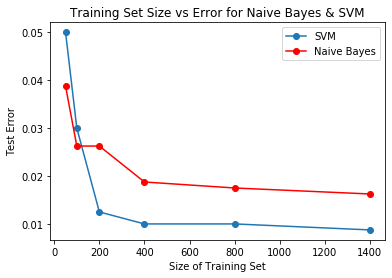

In [9]:
#Comparison between Naive Bayes and SVM
plt.plot(size, error, '-o', label = 'SVM')
plt.plot(size, error1, '-o', color = 'red', label = 'Naive Bayes')
plt.title('Training Set Size vs Error for Naive Bayes & SVM')
plt.xlabel('Size of Training Set')
plt.ylabel('Test Error')
plt.legend()